<a href="https://colab.research.google.com/github/Harshi141006/codsoft/blob/main/Sales_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
sns.set(style="whitegrid")

# Step 2: Load the Dataset

In [ ]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Step 3: Data Exploration

In [ ]:
print("Dataset Info:")
df.info()
print("\nStatistical Summary:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

Statistical Summary:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


# Step 4: Data Visualization

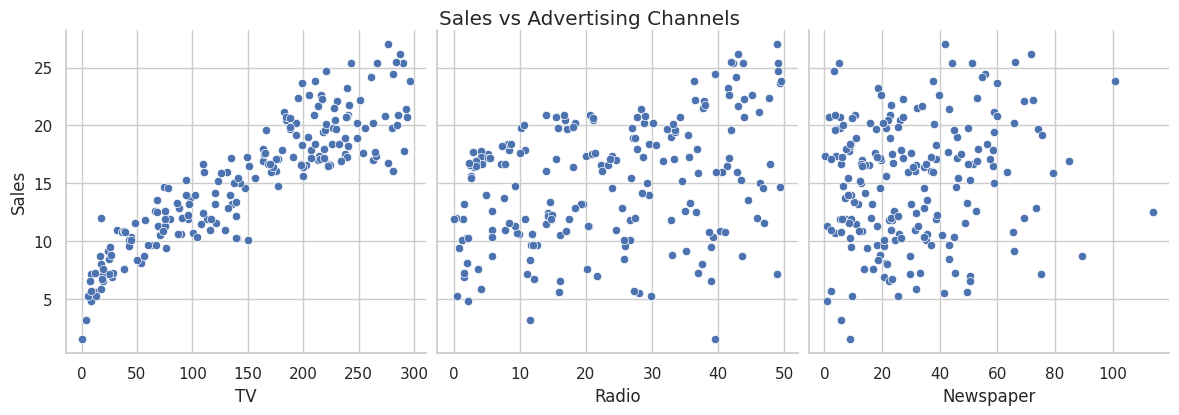

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle("Sales vs Advertising Channels", y=1.02)
plt.show()

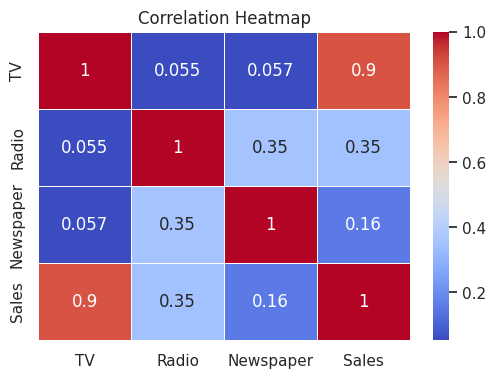

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

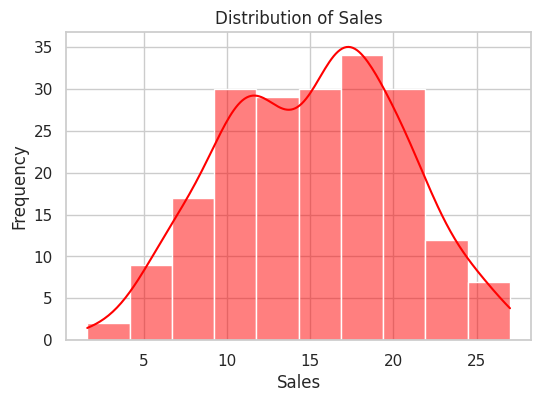

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Sales'], kde=True, color='red')
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

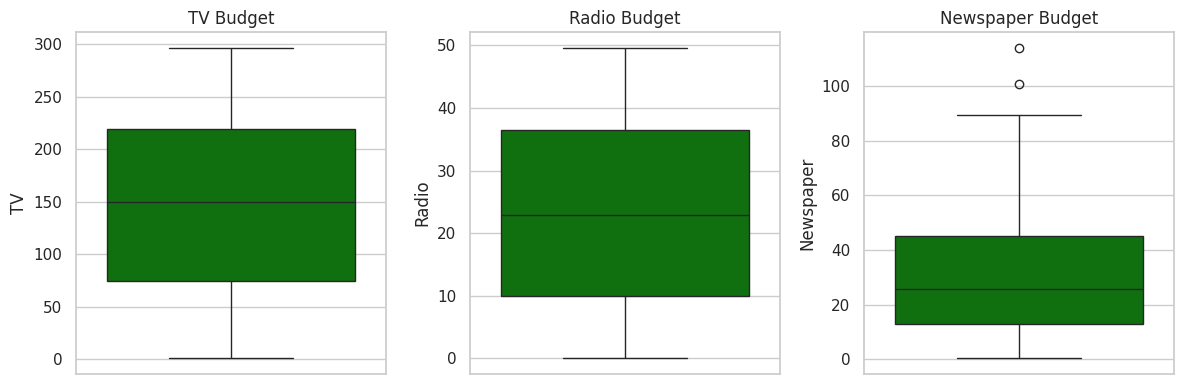

In [ ]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(['TV', 'Radio', 'Newspaper']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col], color='green')
    plt.title(f"{col} Budget")
plt.tight_layout()
plt.show()

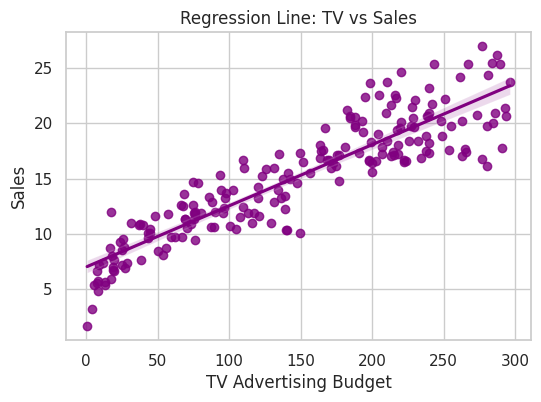

In [ ]:
plt.figure(figsize=(6, 4))
sns.regplot(x='TV', y='Sales', data=df, color='purple')
plt.title("Regression Line: TV vs Sales")
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.show()

# Step 5: Simple Linear Regression

In [ ]:
X = df[['TV']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: 7.007108428241848
Coefficient: 0.0554829439314632


# Step 6: Predictions and Evaluation

In [ ]:
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 6.101072906773963
R2 Score: 0.802561303423698


# Step 7: Visualizations for Evaluation

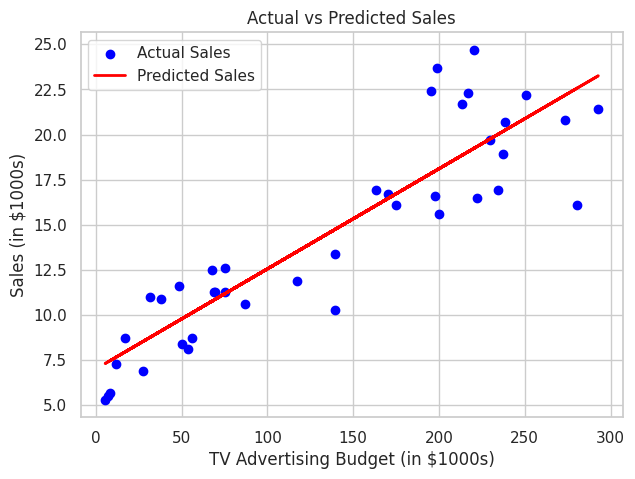

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Sales')
plt.xlabel("TV Advertising Budget (in $1000s)")
plt.ylabel("Sales (in $1000s)")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()


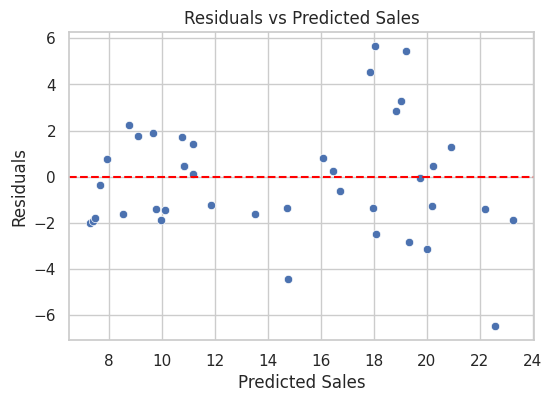

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales")
plt.show()

<Figure size 1200x600 with 0 Axes>

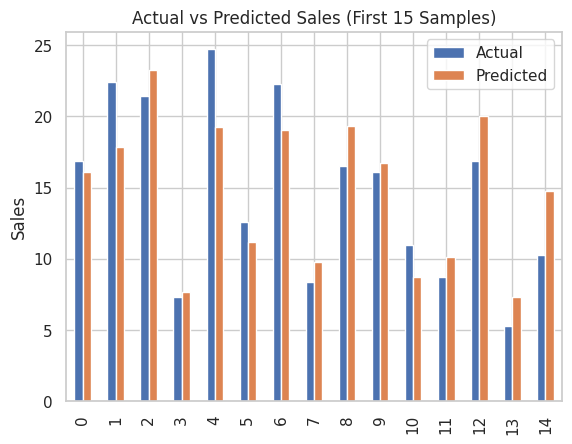

In [ ]:
compare_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
compare_df = compare_df.reset_index(drop=True)
plt.figure(figsize=(12, 6))
compare_df.head(15).plot(kind='bar')
plt.title("Actual vs Predicted Sales (First 15 Samples)")
plt.ylabel("Sales")
plt.grid(True)
plt.show()